In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in '%s': %s" % (cwd, files))

Files in 'H:\git-files\test_task': ['.git', '.ipynb_checkpoints', 'classification_case.xlsx', 'explore data.ipynb', 'explore data_cosine_similarity.ipynb', 'README.md']


# ЗАГРУЖАЕМ ДАННЫЕ

In [4]:
data = pd.read_excel ( files[2] , sheetname = 'classific_data')

In [5]:
data.head()

,client_id,f1,f2,f3,f4,f5,f6,f7,f8
0,1,8,3557.333333,6.000000,68.489754,79.901296,6,5959.920000,42.304261
1,2,5,19046.793754,6.666667,103.547196,9.186530,7,163662.266667,0.000000
2,3,3,1204.780421,0.666667,0.715220,4.637334,5,37436.670000,0.000000
3,4,3,4413.223754,0.666667,25.565524,100.000000,2,4410.333333,0.000000
4,5,2,1669.557088,0.333333,21.997435,100.000000,2,1666.666667,100.000000


In [6]:
data.describe()

,client_id,f1,f2,f3,f4,f5,f6,f7,f8
count,38042.000000,38042.000000,38042.000000,38042.000000,38042.000000,38042.000000,38042.000000,38042.000000,38042.000000
mean,19066.025025,3.786341,1825.014434,2.478681,9.406951,53.460531,4.689764,9693.362100,16.158784
std,11031.312574,2.373806,9014.324422,3.460545,62.968718,33.598829,1.856506,29049.105043,29.474831
min,1.000000,1.000000,2.890421,0.333333,-850.600995,0.000290,2.000000,0.223333,0.000000
25%,9510.250000,2.000000,144.223754,0.666667,-2.401210,21.756891,3.000000,977.524167,0.000000
50%,19032.500000,3.000000,387.890421,1.333333,-0.295001,53.173011,4.000000,2789.128333,0.000000
75%,28622.750000,5.000000,1189.477921,3.000000,6.475173,86.342162,6.000000,7857.293333,19.917339
max,38192.000000,31.000000,559162.570421,103.000000,3393.505350,100.000000,16.000000,877269.496667,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A6A1470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C80FE10>]], dtype=object)

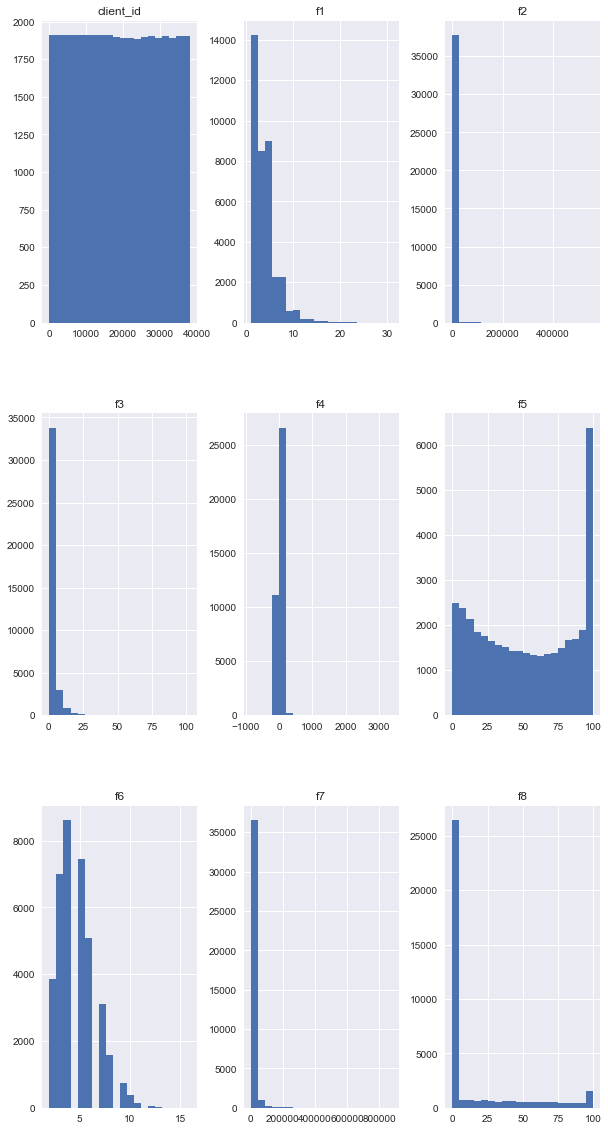

In [7]:
data .hist(figsize = (10,20), bins=20)

# Рассчитываем корреляцию между данными

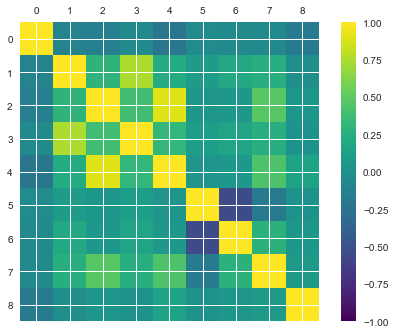

In [8]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1,cmap='viridis')
fig.colorbar(cax)
plt.show()

In [9]:
def red_0_5 (x):
    color = 'red' if abs(x) >0.5 else 'black'
    return 'color: %s' % color

In [10]:
data.corr().style.applymap(red_0_5)

,client_id,f1,f2,f3,f4,f5,f6,f7,f8
client_id,1,-0.102901,-0.134453,-0.0396773,-0.217578,-0.035144,-0.0503826,-0.0411255,-0.165143
f1,-0.102901,1,0.298018,0.755192,0.23428,0.0968116,0.205113,0.264603,-0.0080654
f2,-0.134453,0.298018,1,0.387423,0.903163,0.0607256,0.0675355,0.477876,0.0475889
f3,-0.0396773,0.755192,0.387423,1,0.321514,0.113049,0.169114,0.256286,0.019281
f4,-0.217578,0.23428,0.903163,0.321514,1,0.0436537,0.0679912,0.438032,0.156993
f5,-0.035144,0.0968116,0.0607256,0.113049,0.0436537,1,-0.532942,-0.17666,0.0240129
f6,-0.0503826,0.205113,0.0675355,0.169114,0.0679912,-0.532942,1,0.286182,0.0601347
f7,-0.0411255,0.264603,0.477876,0.256286,0.438032,-0.17666,0.286182,1,0.0748048
f8,-0.165143,-0.0080654,0.0475889,0.019281,0.156993,0.0240129,0.0601347,0.0748048,1


### Максимальная корреляция между f2 и f4

In [11]:
data_columns= []
for i in range(1,8):
    data_columns.append("f"+str(i))

In [12]:
data_columns

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']

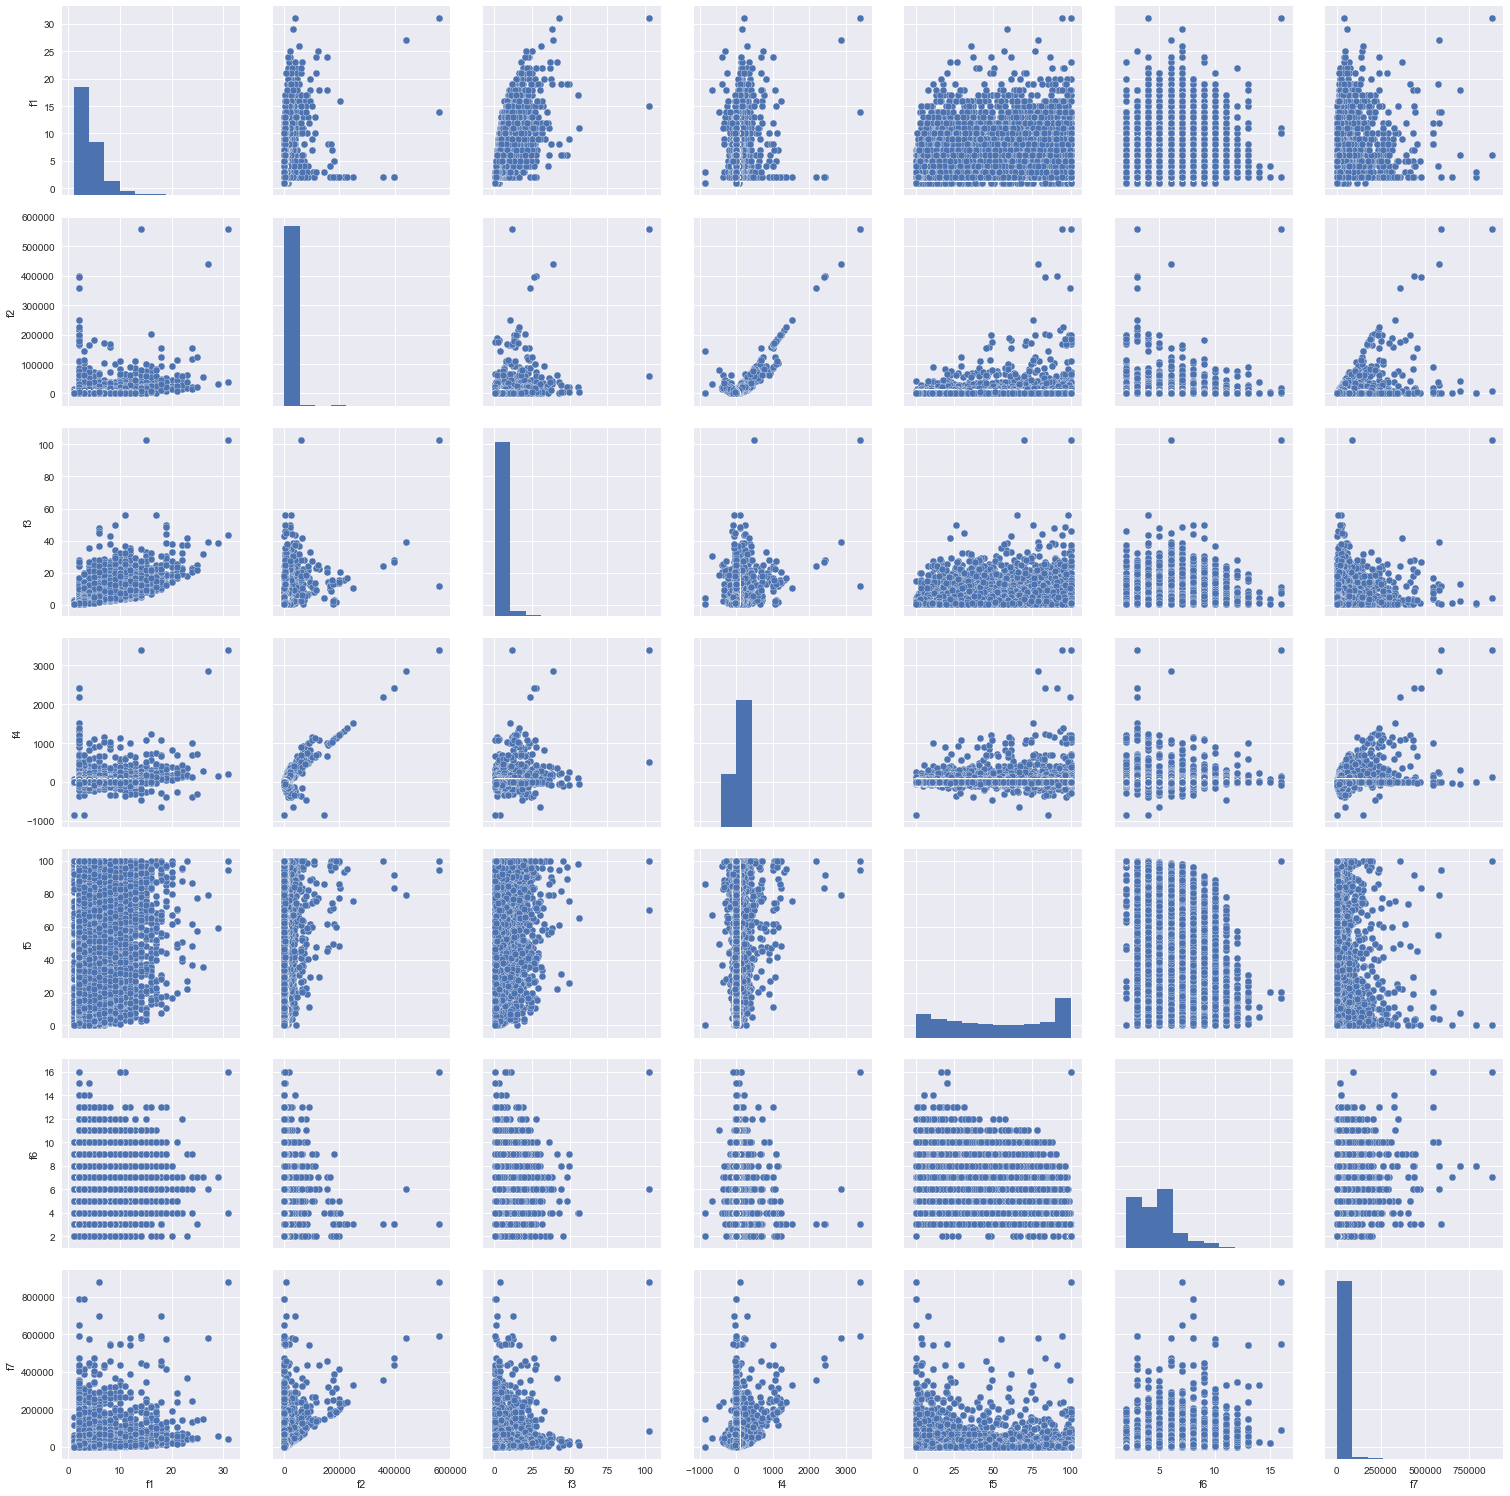

In [13]:
sns.pairplot(data[data_columns], size =3)

### Видим, что в распределении данных есть глобальный тренд, однако на на отрезке [0,200000] можно выделить несколько классов (примерно 3) по косинусной мере для того, чтобы исключить одну из коррелирующих переменных, но сохранить максимальное количество данных.

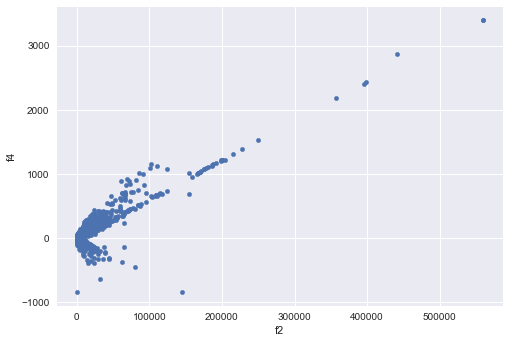

In [14]:
data.plot.scatter ('f2','f4')

### Вторая пара по уровню корреляции - параметры f1 и f3. Наблюдается зависимость между f1 и минимальным значением f3.

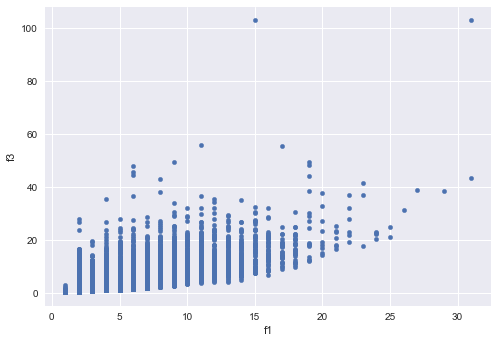

In [15]:
data.plot.scatter ('f1','f3')

In [16]:
data.groupby('f1').f3.min().reset_index().corr().style.applymap(red_0_5)

,f1,f3
f1,1,0.910078
f3,0.910078,1


# Кластеризация данных

### Если проанализировать данные с помощью метода главных компонент, можно увидеть, что почти вся вариабельность данных описывается двумя ортогональными компонентами.

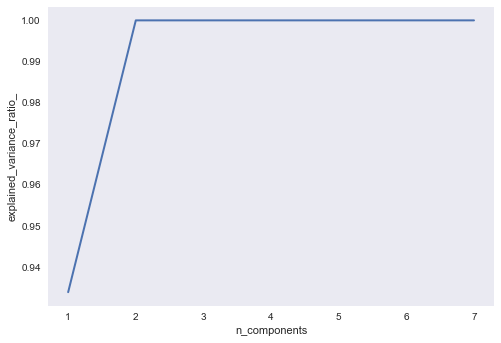

In [17]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True).fit(data[data_columns])

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [18]:
data_pca = PCA(n_components=2, whiten=True).fit_transform(data)

In [19]:
data_pca.shape

(38042, 2)

#### Распределение первой компоненты можно описать гамма распределение с максимальной плотностью около 0.

(array([  3.75360000e+04,   3.18000000e+02,   1.04000000e+02,
          3.60000000e+01,   2.60000000e+01,   1.00000000e+01,
          5.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00]),
 array([ -0.34832279,   2.89856285,   6.14544849,   9.39233413,
         12.63921976,  15.8861054 ,  19.13299104,  22.37987668,
         25.62676232,  28.87364796,  32.1205336 ]),
 <a list of 10 Patch objects>)

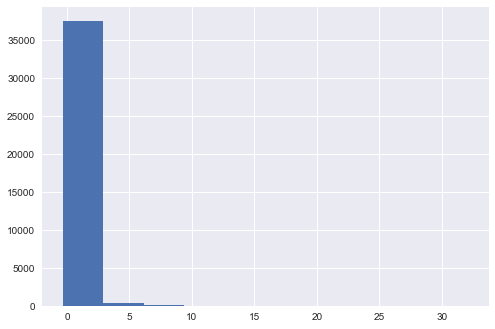

In [20]:
data_pca_0=[]
for i in range (len(data_pca)):
    data_pca_0.append(data_pca[i][0])
plt.hist(data_pca_0)

In [21]:
data_pca_0_test = [np.log(np.log(np.log(np.log(x+1)+1)+1)+1) for x in data_pca_0]

(array([  693.,  2396.,  3856.,  5210.,  5605.,  5638.,  5428.,  4758.,
         3362.,  1096.]),
 array([-1.70736383, -1.47150259, -1.23564135, -0.99978011, -0.76391888,
        -0.52805764, -0.2921964 , -0.05633516,  0.17952608,  0.41538732,
         0.65124855]),
 <a list of 10 Patch objects>)

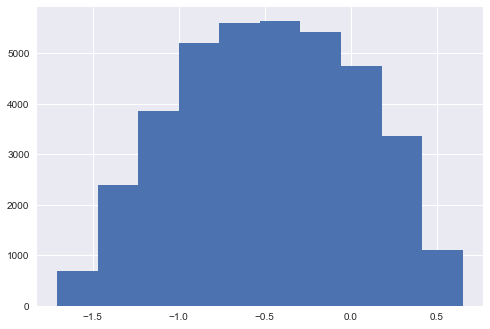

In [22]:
plt.hist([np.log(np.log(np.log(np.log(x+1)+1)+1)+1) for x in data_pca_0])

##### Вторая компонента распределена нормально.

(array([  1.10000000e+01,   6.00000000e+01,   8.89800000e+03,
          1.20040000e+04,   1.19510000e+04,   5.09100000e+03,
          2.00000000e+01,   3.00000000e+00,   1.00000000e+00,
          3.00000000e+00]),
 array([-4.15208345, -3.07116608, -1.99024871, -0.90933135,  0.17158602,
         1.25250339,  2.33342075,  3.41433812,  4.49525549,  5.57617285,
         6.65709022]),
 <a list of 10 Patch objects>)

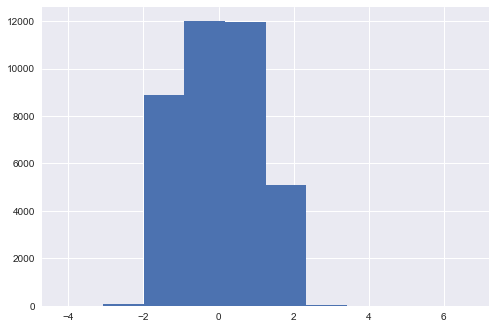

In [23]:
data_pca_1=[]
for i in range (len(data_pca)):
    data_pca_1.append(data_pca[i][1])
plt.hist(data_pca_1)

In [25]:
data_transformed=pd.DataFrame({'f0':data_pca_0, 'f1':data_pca_1})

In [26]:
data_transformed_test=pd.DataFrame({'f0':data_pca_0_test, 'f1':data_pca_1})

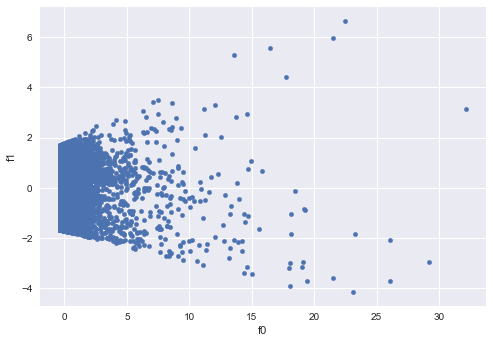

In [27]:
data_transformed.plot.scatter ('f0', 'f1')

# KMEANS

In [29]:
from sklearn.cluster import MiniBatchKMeans

In [30]:
clusterer = MiniBatchKMeans(n_clusters=3)

In [31]:
kmeans_pca_labels = clusterer.fit_predict(data_transformed)

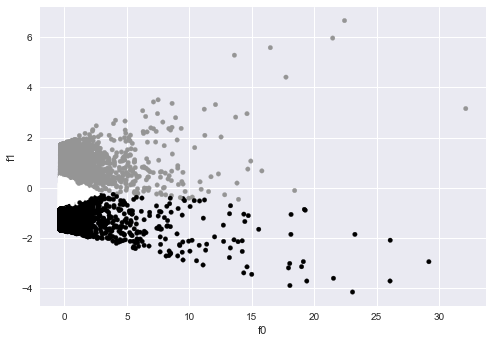

In [32]:
data_transformed.plot.scatter ('f0', 'f1', color = kmeans_pca_labels)

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_pca_Kmeans = silhouette_score(data[data_columns], kmeans_pca_labels, sample_size = 10000)

In [35]:
silhouette_pca_Kmeans

-0.12799323531117895

#### Кластеризация данных с помощью алгоритма KMEANS не дает устойчивых результатов.

# BIRCH

In [36]:
from sklearn.cluster import Birch

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
data_scaled = StandardScaler().fit_transform(data[data_columns])

In [41]:
clusterer=Birch(threshold=0.05, branching_factor=1000)

In [42]:
birch_labels = clusterer.fit_predict(data_scaled)

In [43]:
silhouette_birch = silhouette_score(data[data_columns], birch_labels, sample_size = 10000)

In [44]:
silhouette_birch 

0.42733642710716041

#### Кластеризация данных с помощью алгоритма BIRCH дает лучший результат с отчетливыми классами.